# Assignment #2 - Classification

<font color="red"> <b> Due: Feb 26 (Monday) 11:00 pm </b> </font>

# Kiran Korey 

# I. Introduction

Describe the objective of this assignment. You can briefly state how you accompilsh it.

# II. Data

Introduce your data and visualize them. Describe your observations about the data.
You can reuse the data that you examined in Assignment #0 (of course for classification). 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

# Reading data 
df = pd.read_csv("mushrooms.csv",header=0);
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,s,w,w,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,s,w,w,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,s,w,w,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,s,w,w,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,s,w,w,w,o,e,n,a,g


In [2]:
from sklearn import preprocessing
lbl = preprocessing.LabelEncoder()
for f in range(22):
    df.iloc[:,f] = lbl.fit_transform(df.iloc[:,f])

df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,2,7,7,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,2,7,7,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,2,7,7,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,2,7,7,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,2,7,7,2,1,0,3,0,1


In [3]:
missing_df = df.isnull().sum(axis=0).reset_index()
missing_df.columns = ['column_name', 'missing_count']
missing_df = missing_df.loc[missing_df['missing_count']>0]
missing_df = missing_df.sort_values(by='missing_count')
missing_df

,column_name,missing_count


In [4]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,...,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,0.482029,3.348104,1.827671,4.504677,0.415559,4.144756,0.974151,0.161497,0.309207,4.810684,...,1.575086,1.603644,5.816347,5.794682,1.965534,1.069424,2.291974,3.596750,3.644018,1.508616
std,0.499708,1.604329,1.229873,2.545821,0.492848,2.103729,0.158695,0.368011,0.462195,3.540359,...,0.621459,0.675974,1.901747,1.907291,0.242669,0.271064,1.801672,2.382663,1.252082,1.719975
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,3.000000,0.000000,2.000000,1.000000,0.000000,0.000000,2.000000,...,1.000000,1.000000,6.000000,6.000000,2.000000,1.000000,0.000000,2.000000,3.000000,0.000000
50%,0.000000,3.000000,2.000000,4.000000,0.000000,5.000000,1.000000,0.000000,0.000000,5.000000,...,2.000000,2.000000,7.000000,7.000000,2.000000,1.000000,2.000000,3.000000,4.000000,1.000000
75%,1.000000,5.000000,3.000000,8.000000,1.000000,5.000000,1.000000,0.000000,1.000000,7.000000,...,2.000000,2.000000,7.000000,7.000000,2.000000,1.000000,4.000000,7.000000,4.000000,2.000000
max,1.000000,5.000000,3.000000,9.000000,1.000000,8.000000,1.000000,1.000000,1.000000,11.000000,...,3.000000,3.000000,8.000000,8.000000,3.000000,2.000000,4.000000,8.000000,5.000000,6.000000


In [5]:
def partition_data(X,T,ratio=[0.8,0.2]):
        assert(np.sum(ratio) == 1)
    
        idxs = np.random.permutation(X.index)
        N = X.shape[0]
    
        X_ = []
        T_ = []
    
        i = 0
        for j, r in enumerate(ratio):
            rows = int(round(N * r))
            if j == len(ratio) -1:
               X_.append(X.iloc[i:, :])
               T_.append(T.iloc[i:, :])        
            else:
                X_.append(X.iloc[i:i+rows, :])
                T_.append(T.iloc[i:i+rows, :])
        
            i+= rows
    
        return X_, T_

In [30]:
from sklearn.cross_validation import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(df[df.columns[1 :]], df.loc[:,'class'], train_size=0.8)
Y_train = np.where(Y_train == 1,-1,1)
Y_test =  np.where(Y_test == 1,-1,1)
print(Y_train,Y_test)
X_train.head()

[-1 -1  1 ...,  1  1  1] [-1 -1 -1 ...,  1  1  1]


,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
1786,2,3,4,1,6,1,0,1,5,0,...,2,2,7,7,2,1,4,2,3,5
8108,3,3,2,0,8,1,0,1,0,1,...,1,2,6,7,2,1,0,7,4,2
2368,5,3,4,1,5,1,0,0,5,1,...,2,2,3,7,2,1,4,2,4,0
7235,3,2,4,0,5,0,0,0,5,0,...,2,2,5,5,1,1,4,8,1,2
5973,5,3,2,0,8,1,0,1,0,1,...,1,1,6,6,2,1,0,7,4,2


In [7]:
# Xdata, Tdata = partition_data(pd.DataFrame(df.iloc[:,1:]), pd.DataFrame(df.loc[:,'class']))
# #Partitioning the dataset into train and test set with 80% in train and 20% in test 
# X_train, X_test = [x_.as_matrix() for x_ in Xdata]
# Y_train, Y_test = [t_.as_matrix() for t_ in Tdata]

# III. Method

Summarize the pocket algorithm, discriminant analysis, and logistic regression.
The superclass *Classifier* defines common utility methods. 
Finish the normalize function for you. 
Do not forget explain your implementation. 

The explanation of your codes should not be the comments in a code cell. 
This section should include
 - review of the 4 classification models 
 - your implementation and description


### A. Super Classs Definition

In [9]:
import numpy as np
from abc import ABC, abstractmethod

# Super class for machine learning models 

class BaseModel(ABC):
    """ Super class for ITCS Machine Learning Class"""
    
    @abstractmethod
    def train(self, X, T):
        pass

    @abstractmethod
    def use(self, X):
        pass

    

class Classifier(BaseModel):
    """
        Abstract class for classification 
        
        Attributes
        ==========
        meanX       ndarray
                    mean of inputs (from standardization)
        stdX        ndarray
                    standard deviation of inputs (standardization)
    """

    def __init__(self, ):
        self.meanX = None
        self.stdX = None

    def normalize(self, X):
        """ standardize the input X """
        
        if not isinstance(X, np.ndarray):
            X = np.asanyarray(X)

        self.meanX = np.mean(X, 0)
        self.stdX = np.std(X, 0)

        # TODO: Finish this normalization
        Xs = (X - self.meanX) / self.stdX
        return Xs

#     def normalize(self, X):
#         mu = X.mean()
#         std = X.std()
#         print("mu in norm",mu)
#         print("std in norm",std)
#         return (X-mu)/std

    def _check_matrix(self, mat, name):
        if len(mat.shape) != 2:
            raise ValueError(''.join(["Wrong matrix ", name]))
        
    # add a basis
    def add_ones(self, X):
        """
            add a column basis to X input matrix
        """
        self._check_matrix(X, 'X')
        return np.hstack((np.ones((X.shape[0], 1)), X))

    ####################################################
    #### abstract funcitons ############################
    abstractmethod
    def train(self, X, T):
        pass
    
    abstractmethod
    def use(self, X):
        pass 

### B. Pocket Algorithm

In [10]:
from copy import deepcopy as copy 
# Pocket Algorith
class Pocket(Classifier):
    


    def __init__(self,alpha):
        Classifier.__init__(self)
        self.w=None
        self.w_pocket=None
        self.alpha = alpha
        
    # return 1 if w is better -1 if wp is better
    def compare(self,X, T, w, wp):
        y = np.sign(X @ w)
        yp = np.sign(X @ wp)
        return 1 if np.sum(y == T) >= np.sum(yp == T) else -1

    # train Pocket Algorithm
    def train(self, X, T):
        Xs= self.normalize(X)
        maxiter = 10#1000
        N = 10#X.shape[0]
        if(self.w is None):
            self.w = np.zeros(Xs.shape[1]) 
            self.w_pocket = copy(self.w)
        for i in range(maxiter):
            converged = True
            for k in np.random.permutation(N): #range(N):
                y = self.w @ Xs[k,:]
                if np.sign(y) != np.sign(T[k]):
                    self.w += self.alpha * T[k] * Xs[k,:]
                    converged = False
                    ##### additional for pocket algorithm 
                    if self.compare(Xs, T, self.w, self.w_pocket) > 0: 
                        self.w_pocket[:] = self.w[:]

            if converged:
                print("converged at ", i)
                break
        
    
    # apply the learned model to data X
    def use(self, X):
        #print("use w_pocket",self.w_pocket)
        Xs = (X - self.meanX) / self.stdX
        return Xs@self.w_pocket

### C. QDA

In [11]:
# QDA Classifier
class QDA(Classifier):
    
    def __init__(self):
        Classifier.__init__(self)
        self.mu = []
        self.Sigma = []
        self.prior = []
        
    def discriminant(self,X, mu, sigma, prior):
        sigma_inv = np.linalg.inv(sigma)
        diffv = X - mu
        return -0.5  * np.log(np.linalg.det(sigma)) \
                - 0.5 * np.sum(diffv @ sigma_inv * diffv, axis=1) \
                + np.log(prior)
                    
    def train(self, X, T):
        Xs = self.normalize(X)
        N = Xs.shape[0]
        for c in np.unique(T):
            c = T==c
            mu = np.mean(Xs[c,:],0)
            Sigma = np.cov(Xs[c].T)
            prior = np.sum(c) / N
            
            self.mu.append(mu)
            self.Sigma.append(Sigma)
            self.prior.append(prior)
            
    def use(self, X):
        Xs = (X-self.meanX)/self.stdX
        d = []
        for i in range(len(self.mu)):
            d.append(self.discriminant(Xs, self.mu[i], self.Sigma[i], self.prior[i]))
#         print(np.argmax(np.array(d),axis=0))
        return d
#         return np.argmax(np.array(d),axis=0)


### D. LDA

In [12]:
# LDA Classifier
class LDA(Classifier):
    
    def __init__(self):
        Classifier.__init__(self)
        self.mu = []
        self.Sigma = []
        self.prior = []        
            
#     def discriminant(self,X, mu, sigma, prior):
#         print("here")
#         sigma_inv = np.linalg.inv(sigma)
#         return np.sum(np.dot(X, sigma_inv) * mu \
#                     - 0.5 * np.dot(mu, sigma_inv) * mu \
#                     + np.log(prior), axis=1)
    def discriminant(self, X, mu, sigma, prior):
        sigInv = np.linalg.inv(sigma)
        return X@sigInv@mu - .5*mu.T@sigInv@mu + np.log(prior)
                    
    def train(self, X, T):
        Xs = self.normalize(X)
        N = Xs.shape[0]
        self.Sigma = np.cov(Xs.T)
        for c in np.unique(T):
            c = T==c
            mu = np.mean(Xs[c,:],0)
            prior = np.sum(c) / N
#             Sigma = np.cov(Xs[c].T)
            
            self.mu.append(mu)
#             self.Sigma.append(Sigma)
            self.prior.append(prior)
        
            
    def use(self, X):
        Xs = (X-self.meanX)/self.stdX
        d = []
        for i in range(len(self.mu)):
            d.append(self.discriminant(Xs, self.mu[i], self.Sigma, self.prior[i]))
        return d


### E. Logistic Regression

In [13]:
# LogisticRegression Class
from copy import deepcopy as copy
class LogRegression(Classifier): 
    """ 
        Logistic Regression class 
        
        attributes
        ===========
        
    """
    def __init__(self,alpha):
        Classifier.__init__(self)
        self.w = None
        self.alpha = alpha
    
    def softmax(self,z):
        if not isinstance(z, np.ndarray):
            z = np.asarray(z)
        f = np.exp(z) 
        return f / (np.sum(f, axis=1, keepdims=True) if len(z.shape) == 2 else np.sum(f))

    def g(self,X, w):
        return self.softmax(X @ w) 
        
    def train(self, X, T):
        X = self.normalize(X)
       
        N = X.shape[0]
        D = X.shape[1]
        K = len(np.unique(T))
        
        self.w = np.random.rand(D+1, K)
        niter = 10
        X = self.add_ones(X)
        
        T = self.add_ones(T.reshape(-1,1))
        
        for step in range(niter):
            for i in range(N):
                ys = self.g(X,self.w)
                self.w += self.alpha * X.T @ (T - ys)  
              
    
    # apply the learned model to data X
    def use(self, X):
        Xs = (X - self.meanX)/self.stdX
        Xs = self.add_ones(Xs)
        return self.g(Xs, self.w)

### F. Comparission 

In [14]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score


def accuracy(Y,T):
    return np.sum(Y == T)/len(Y)

def precision(cfm):
    cfm = cfm.as_matrix()
    cfm = np.float64(cfm)
    return cfm[1, 1] / (cfm[1, 1] + cfm[1, 0])

def recall(cfm):
    cfm = cfm.as_matrix()
    cfm = np.float64(cfm)
    return cfm[1, 1] / (cfm[1, 1] + cfm[0,1])

def specificity(cfm):
    cfm = cfm.as_matrix()
    cfm = np.float64(cfm)
    return cfm[0,0]/(cfm[0,0]+cfm[1,0])

def f1Score(cfm):
    cfm = cfm.as_matrix()
    cfm = np.float64(cfm)
    return cfm[1,1] / cfm[1,1] + ((cfm[0,1]+cfm[1,0])/2)

# TN= cfm[0,0]
# FN= cfm[0,1]
# FP= cfm[1,0]
# TP= cfm[1,1]
def MCC(cfm):
    cfm = cfm.as_matrix()
    cfm = np.float64(cfm)
    return (cfm[1,1] * cfm[0,0]) - (cfm[1,0] * cfm[0,1]) \
    / np.sqrt((cfm[1,1] +cfm[1,0]) * (cfm[1,1] + cfm[0,1]) * (cfm[0,0] + cfm[1,0]) * (cfm[0,0] + cfm[0,1]))

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1.02])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)

def roc(prob,Y):
    fpr, tpr, thresholds = roc_curve(Y, prob)
    plt.figure(figsize=(8, 6))
    plot_roc_curve(fpr, tpr)
    plt.show()
    
def roc_auc(prob,Y):
    return roc_auc_score(Y, prob)


def confusion_matrix(Y, T):
    """
        Y    nd.array
             predicted labels
        T    nd.array
             target labels
             
        @cfm DataFrame
             confusion matrix
    """
    
    if len(Y) != len(T):
        raise ValueError("Wrong prediction and target length!")
    
    classes = np.unique(T)
    n_classes = len(classes)
    
    cfm = pd.DataFrame(np.zeros((n_classes, n_classes)), index=classes, columns=classes, dtype=int)
    
    Tidx = [T == c for c in classes]
    for c in classes:
        pred_idx = Y == c
        cfm.loc[c, :] = [np.sum(np.logical_and(pred_idx, tidx)) for tidx in Tidx]
    
    return cfm

def plotClassifedResult(Y,T):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(T, 'o', color='b', label='Real') 
    ax.plot(Y, '.', color='r', label='Predicted')
    ax.set_xlabel('Index')
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles, labels)
    plt.show()
                                                     
def allStats(Y,T):
#     if(flag):
#         print("=============================================================")
#         Ys=np.sign(Y)
#     else:
#         Ys=Y
    cfm = confusion_matrix(Y,T)
    display(cfm)
    display(pd.DataFrame([['TN','FN'],['FP','TP']],index=["-","+"],columns=["-","+"]))
    stats = [accuracy(Y,T),precision(cfm),recall(cfm),specificity(cfm),f1Score(cfm),MCC(cfm),roc_auc(Y,T)]
    display(pd.DataFrame(stats,index=["Accuracy","Precision","Recall","Specificity","F1 Score","MCC","ROC_AUC"],columns=["Stats"]))
    plotClassifedResult(Y,T)
    roc(Y,T)
    return stats 

# IV. Experiments

Apply the classfiers on the data and discuss the results.
Please describe your codes for experiments. You may have subsections of results and discussions here.
Here follows the list that you consider to include:
- the classification results
- plots of classification results 
- model comparision 
- choice of evaluation metrics
- **Must partition data into training and testing**

converged at  2


,-1,1
-1,669,95
1,128,733


,-,+
-,TN,FN
+,FP,TP


,Stats
Accuracy,0.862769
Precision,0.851336
Recall,0.885266
Specificity,0.839398
F1 Score,112.500000
MCC,490376.981544
ROC_AUC,0.862332


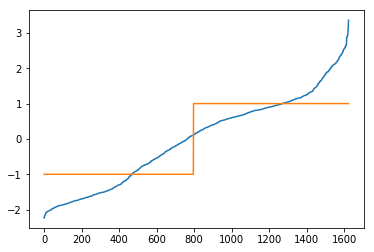

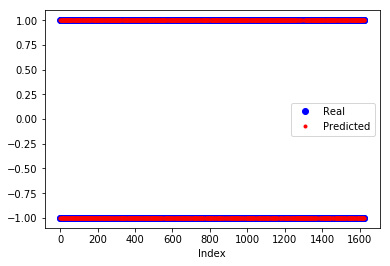

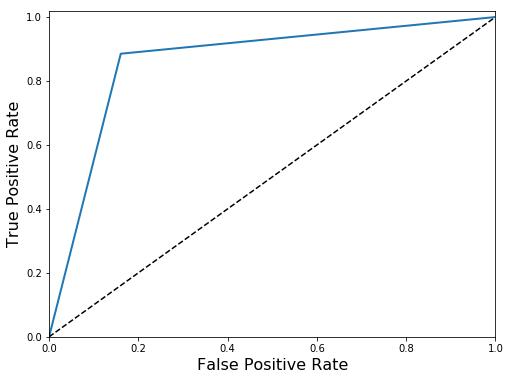

In [27]:
pa = Pocket(0.1) 
pa.train(X_train,Y_train)
Y_pa = pa.use(X_test)
plt.plot(np.sort(Y_pa,0))
plt.plot(np.sort(Y_test,0))
pa_stats = allStats(np.sign(Y_pa), Y_test)

5


,-1,1
-1,181,0
1,5,214


,-,+
-,TN,FN
+,FP,TP


,Stats
Accuracy,0.987500
Precision,0.977169
Recall,1.000000
Specificity,0.973118
F1 Score,3.500000
MCC,38734.000000
ROC_AUC,0.986559


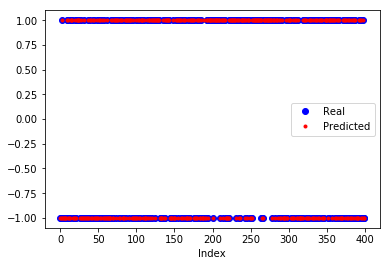

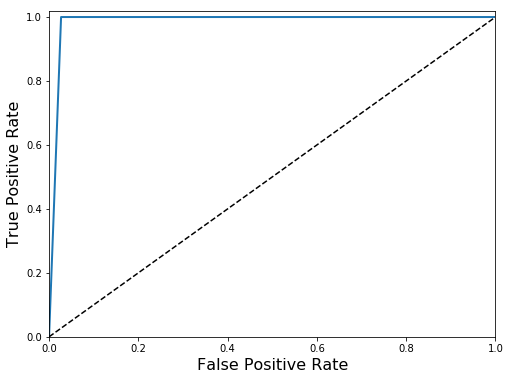

In [16]:
qda = QDA()
qda.train(X_train,Y_train)
D1=[]
D2=[]
D1=qda.use(X_test[:400])
D2 = np.argmax(np.array(D1),axis=0)
D2=np.where(D2==0,-1,1)
errQda = (D2==Y_test[:400])
print(np.size(errQda) - np.count_nonzero(errQda))
qda_stats = allStats(D2, Y_test[:400])

Text(0.5,0,'QDA P(x|Class=k)\n from disc funcs')

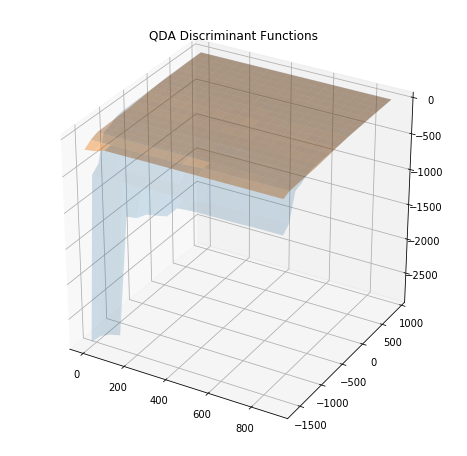

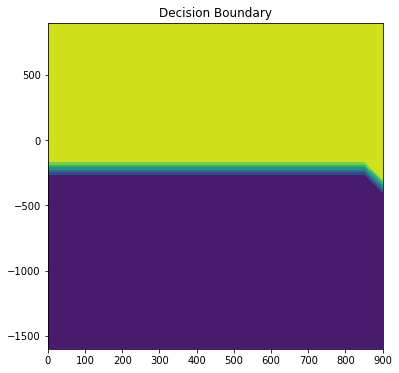

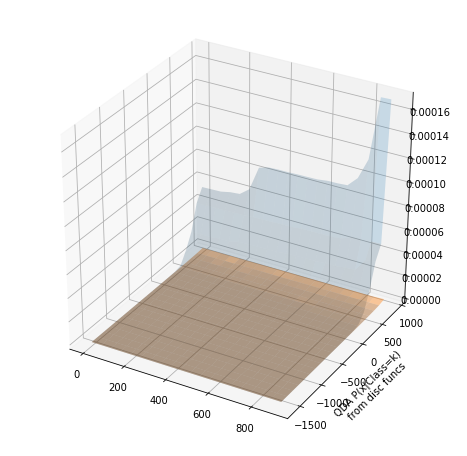

In [17]:
xs, ys = np.meshgrid(np.linspace(0,900, 20), np.linspace(-1600,900, 20))

fig = plt.figure(figsize=(8,8))
ax = fig.gca(projection='3d')
ax.plot_surface(xs, ys, (np.sort(D1[0])).reshape(xs.shape), alpha=0.2)
ax.plot_surface(xs, ys, (np.sort(D1[1])).reshape(xs.shape), alpha=0.4)
plt.title("QDA Discriminant Functions")

plt.figure(figsize=(6,6))
plt.contourf(xs, ys, (np.sort(D1[0]-D1[1]) > 0).reshape(xs.shape))
plt.title("Decision Boundary")

# Plot generative distributions  p(x | Class=k)  starting with discriminant functions

fig = plt.figure(figsize=(8,8))
ax = fig.gca(projection='3d')

prob1 = np.exp( np.sort(D1[0]).reshape(xs.shape) - 0.5*X_train.shape[1]*np.log(2*np.pi) - np.log(qda.prior[0]))
prob2 = np.exp( np.sort(D1[1]).reshape(xs.shape) - 0.5*X_train.shape[1]*np.log(2*np.pi) - np.log(qda.prior[1]))
ax.plot_surface(xs, ys, prob1, alpha=0.2)
ax.plot_surface(xs, ys, prob2, alpha=0.4)


plt.ylabel("QDA P(x|Class=k)\n from disc funcs", multialignment="center")

5


,-1,1
-1,181,0
1,5,214


,-,+
-,TN,FN
+,FP,TP


,Stats
Accuracy,0.987500
Precision,0.977169
Recall,1.000000
Specificity,0.973118
F1 Score,3.500000
MCC,38734.000000
ROC_AUC,0.986559


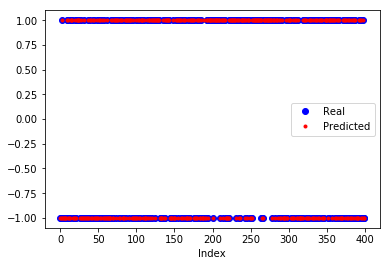

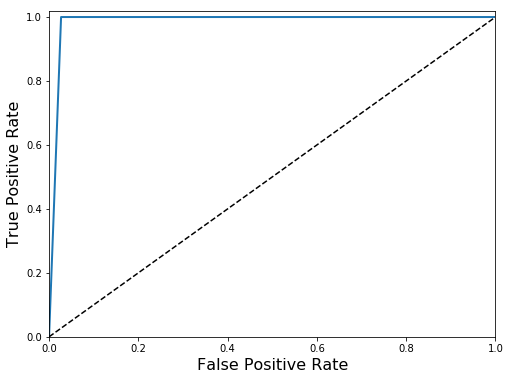

In [18]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
qda1 = QuadraticDiscriminantAnalysis()
qda1.fit(X_train, Y_train)
dSQda = qda1.predict_proba(X_test[:400])
sQD2 = np.argmax(np.array(dSQda),axis=1)
sQD2=np.where(sQD2==0,-1,1)
serrQda = (sQD2==Y_test[:400])
print(np.size(serrQda) - np.count_nonzero(serrQda))
qda_sklearn_stats = allStats(sQD2, Y_test[:400])

30


,-1,1
-1,170,14
1,16,200


,-,+
-,TN,FN
+,FP,TP


,Stats
Accuracy,0.925000
Precision,0.925926
Recall,0.934579
Specificity,0.913978
F1 Score,16.000000
MCC,33999.994368
ROC_AUC,0.924279


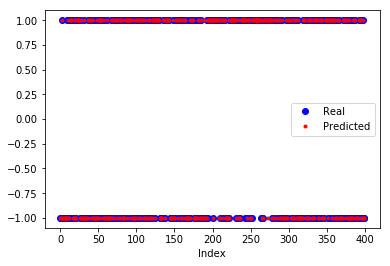

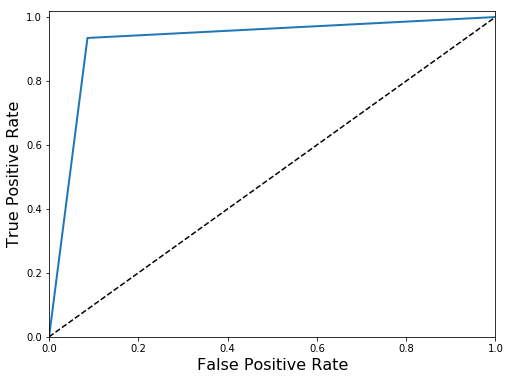

In [19]:
lda = LDA()
lda.train(X_train,Y_train)
LD1=[]
LD2=[]
LD1=lda.use(X_test[:400])
LD2 = np.argmax(np.array(LD1),axis=0)
LD2=np.where(LD2==0,-1,1)
errLda = (LD2==Y_test[:400])
print(np.size(errLda) - np.count_nonzero(errLda))
lda_stats = allStats(LD2, Y_test[:400])

Text(0.5,0,'LDA P(x|Class=k)\n from disc funcs')

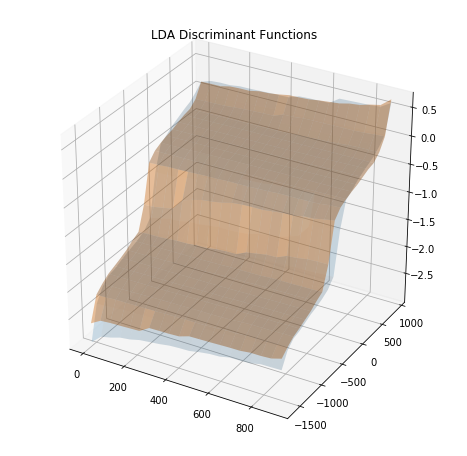

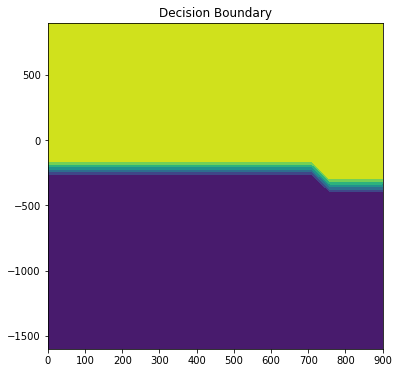

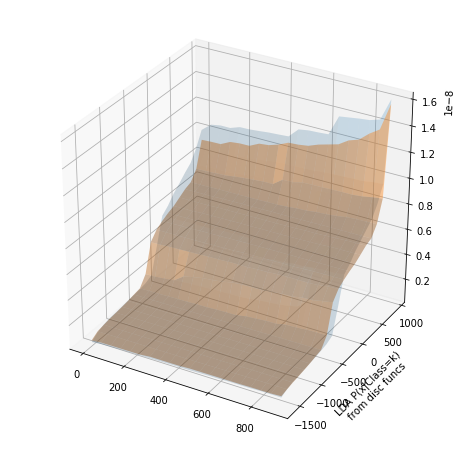

In [20]:
xs, ys = np.meshgrid(np.linspace(0,900, 20), np.linspace(-1600,900, 20))

fig = plt.figure(figsize=(8,8))
ax = fig.gca(projection='3d')
ax.plot_surface(xs, ys, (np.sort(LD1[0])).reshape(xs.shape), alpha=0.2)
ax.plot_surface(xs, ys, (np.sort(LD1[1])).reshape(xs.shape), alpha=0.4)
plt.title("LDA Discriminant Functions")

plt.figure(figsize=(6,6))
plt.contourf(xs, ys, (np.sort((LD1[0]-LD1[1]) > 0)).reshape(xs.shape))
plt.title("Decision Boundary")

# Plot generative distributions  p(x | Class=k)  starting with discriminant functions

fig = plt.figure(figsize=(8,8))
ax = fig.gca(projection='3d')

prob1 = np.exp( np.sort(LD1[0]).reshape(xs.shape) - 0.5*X_train.shape[1]*np.log(2*np.pi) - np.log(lda.prior[0]))
prob2 = np.exp( np.sort(LD1[1]).reshape(xs.shape) - 0.5*X_train.shape[1]*np.log(2*np.pi) - np.log(lda.prior[1]))
ax.plot_surface(xs, ys, prob1, alpha=0.2)
ax.plot_surface(xs, ys, prob2, alpha=0.4)


plt.ylabel("LDA P(x|Class=k)\n from disc funcs", multialignment="center")

,-1,1
-1,170,14
1,16,200


,-,+
-,TN,FN
+,FP,TP


,Stats
Accuracy,0.925000
Precision,0.925926
Recall,0.934579
Specificity,0.913978
F1 Score,16.000000
MCC,33999.994368
ROC_AUC,0.924279


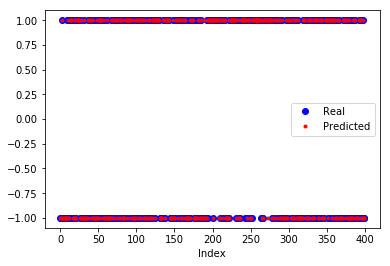

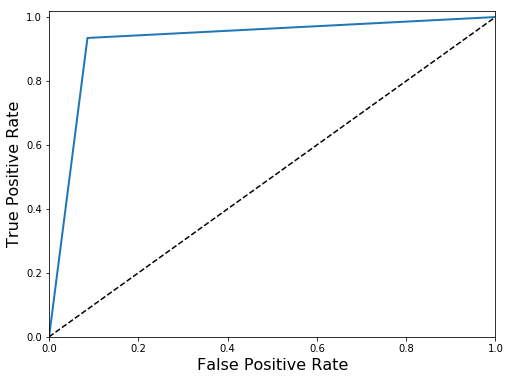

In [21]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
slda = LinearDiscriminantAnalysis(n_components=2)
slda.fit(X_train, Y_train)
dSLda = slda.predict_proba(X_test[:400])
sLD2 = np.argmax(np.array(dSLda),axis=1)
sLD2=np.where(sLD2==0,-1,1)
serrLda = (sLD2==Y_test[:400])
np.size(serrLda) - np.count_nonzero(serrLda)
lda_sklearn_stats = allStats(sLD2, Y_test[:400])

(100, 2)


,0,1
0,49,12
1,10,29


,-,+
-,TN,FN
+,FP,TP


,Stats
Accuracy,0.780000
Precision,0.743590
Recall,0.707317
Specificity,0.830508
F1 Score,12.000000
MCC,1420.949977
ROC_AUC,0.768913


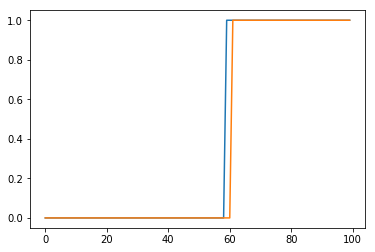

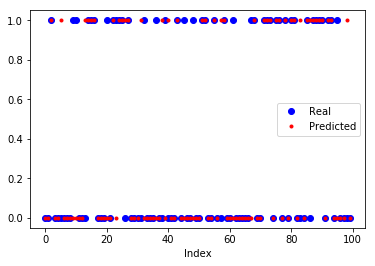

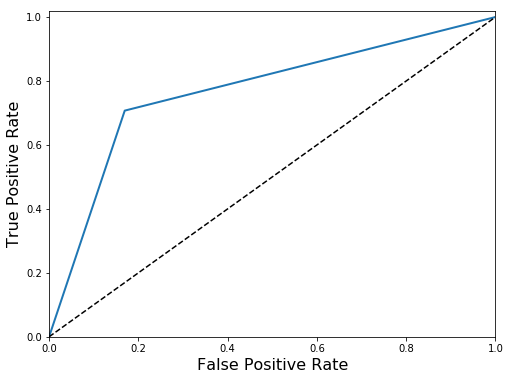

Text(0.5,1,'Decision Boundary')

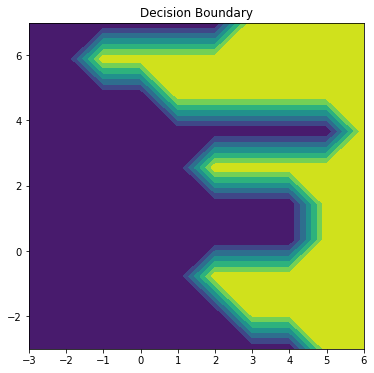

In [22]:
lr = LogRegression(0.00001)
lr.train(X_train[:100],Y_train[:100])
LD1=[]
LD2=[]
LD1=lr.use(X_test[:100])
print(LD1.shape)
Yl = np.argmax(LD1, 1)
Tl=np.where(Y_test==-1,0,1)
plt.plot(np.sort(Tl[:100],0))
plt.plot(np.sort(Yl))

# print("Accuracy: ", 100 - np.mean(np.abs(Tl[:100] - Yl)) * 100, "%")
lr_stats = allStats(Yl, Tl[:100])

x = np.linspace(-3, 6, 10)
y = np.linspace(-3, 7, 10)

xs, ys = np.meshgrid(x, y)

plt.figure(figsize=(6,6))
plt.contourf(xs, ys, np.sort(Yl.reshape(xs.shape)))
plt.title("Decision Boundary")

0.9


,0,1
0,49,12
1,10,29


,-,+
-,TN,FN
+,FP,TP


,Stats
Accuracy,0.780000
Precision,0.743590
Recall,0.707317
Specificity,0.830508
F1 Score,12.000000
MCC,1420.949977
ROC_AUC,0.768913


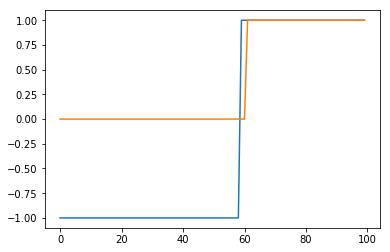

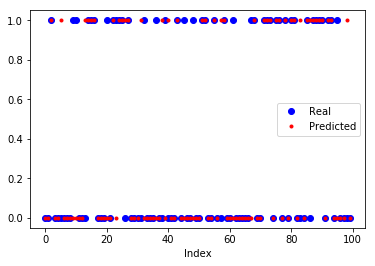

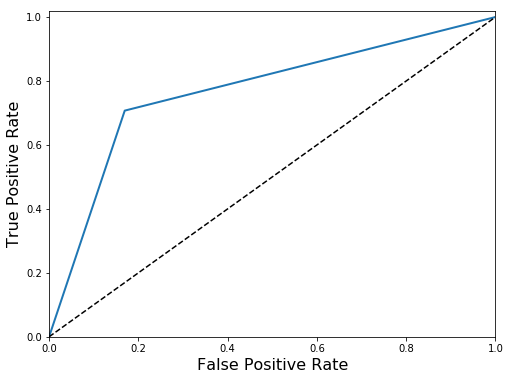

Text(0.5,1,'Decision Boundary')

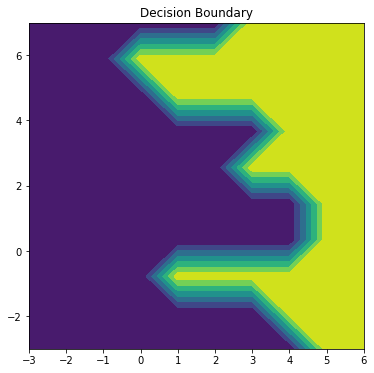

In [23]:
from sklearn.linear_model import LogisticRegression
lr1 = LogisticRegression()
lr1.fit(X_train[:100],Y_train[:100])
dLra = lr1.predict_proba(X_test[:100])
print(lr1.score(X_test[:100],Y_test[:100]))

sYl = np.argmax(dLra, 1)
Tl=np.where(Y_test==-1,0,1)

plt.plot(np.sort(Y_test[:100],0))
plt.plot(np.sort(Yl))

# print("Accuracy: ", 100 - np.mean(np.abs(Tl[:100] - Yl)) * 100, "%")
lr_stats = allStats(Yl, Tl[:100])
x = np.linspace(-3, 6, 10)
y = np.linspace(-3, 7, 10)

xs, ys = np.meshgrid(x, y)

plt.figure(figsize=(6,6))
plt.contourf(xs, ys, np.sort(sYl.reshape(xs.shape)))
plt.title("Decision Boundary")

# Conclusions

Summarize your work here. 
Which classifier do you think the best? 
Discuss the challenges or somethat that you learned. 
If you have any suggestion about the assignment, you can write about it. 

# References

# Extra Credit

Search for a ordinal data set and apply your classifiers to it. 
Repeat the experiments on it. 
Do you have different observation from previous results? 
Were you able to observe that we discussed in class about logistic regression? 
For a full extra credit point, you need to discuss all bullet points in Results section.     

## Grading

DO NOT forget to submit your data! Your notebook is supposed to run well after running your codes. 


points | | description
--|--|:--
5 | Overview| states the objective and the appraoch 
15 | Data | 
 | 5| description 
 | 5| plots for understanding or analysis 
 | 5| preliminary observation 
25 | Methods | 
 |10| Summary of Classification models
 | 5| Explanation of codes
 |10| Pocket, LDA, QDA, Logistic Regression
40 | Experiments 
| 5| Discussion about evaluation metrics
| 5| Discussion about train and test accuracies
|20| plots for results (5 for each algorithm)
|10| Discussions about classificaion model comparison
5 | |Conclusions 
5 | |Referemces
5 | |Grammar and spelling error (Proofread please)